### compare similarity of demux calls

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
projdir = '/u/project/cluo/terencew/demux_benchmark/adelus_2023/'
donors = list(np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str))
samples = list(np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str))
final_samples = samples[:2]
new_samples = [''.join(x.split('_')[:]) for x in samples]
s = samples[0]
titles = [f'Aorta Run {i}' for i in range(1, 8)]

gex_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos', 'scsplit', 'scsplit_nogenos', 
               'souporcell','souporcell_nogenos', 'demuxalot']
atac_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos', 'scsplit', 'scsplit_nogenos', 
               'souporcell','souporcell_nogenos', 'scavengers']

overlap_methods =  ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos', 'scsplit', 'scsplit_nogenos', 
               'souporcell','souporcell_nogenos']

In [4]:
!ls -lt {projdir}/csv/demux/gex/vireo_gex.csv

-rw-r--r--. 1 terencew cluo 5989230 Oct 30  2023 /u/project/cluo/terencew/demux_benchmark/adelus_2023//csv/demux/gex/vireo_gex.csv


In [5]:
vireo_gex = pd.read_csv(f'{projdir}/csv/demux/gex/vireo.csv', sep='\t', header=0, index_col=0)
vireo_atac = pd.read_csv(f'{projdir}/csv/demux/atac/vireo.csv', sep='\t', header=0, index_col=0)

In [6]:
### write to a file for ggplot
inter_gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex.csv', sep='\t', header=0, index_col=0)
inter_atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac.csv', sep='\t', header=0, index_col=0)

gex_majority = inter_gex.mode(axis=1)[0]
atac_majority = inter_atac.mode(axis=1)[0]

inter_gex.replace({'unassigned' : 0, 'doublet' : 0}, inplace=True)
for i in range(13):
    inter_gex.replace({f'donor{i}' : 1}, inplace=True)
    
inter_atac.replace({'unassigned' : 0, 'doublet' : 0}, inplace=True)
for i in range(13):
    inter_atac.replace({f'donor{i}' : 1}, inplace=True)

inter_gex['majority'] = gex_majority
inter_atac['majority'] = atac_majority
inter_gex.to_csv(f'{projdir}/csv/final_figures/figure4/status_gex.csv', sep='\t', header=True, index=True)
inter_atac.to_csv(f'{projdir}/csv/final_figures/figure4/status_atac.csv', sep='\t', header=True, index=True)

In [7]:
vireo_gex.shape, vireo_atac.shape

((35201, 10), (35201, 10))

Text(0, 0.5, 'Number of variants')

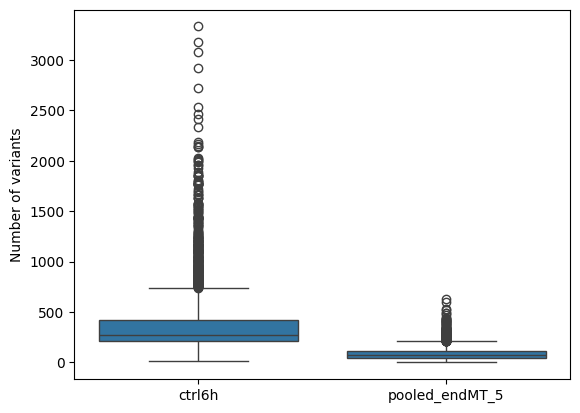

In [8]:
f = ['ctrl6h', 'pooled_endMT_5']
tmp_vireo_gex = vireo_gex[[x in f for x in vireo_gex['t']]][['t', 'n_vars']]
ax = sns.boxplot(tmp_vireo_gex, x='t', y='n_vars')
ax.grid(False)

ax.set_xlabel('')
ax.set_ylabel('Number of variants')

Text(0, 0.5, 'Number of variants')

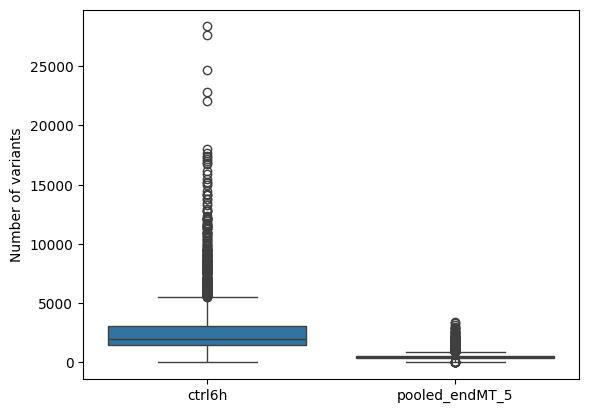

In [9]:
f = ['ctrl6h', 'pooled_endMT_5']
tmp_vireo_atac = vireo_atac[[x in f for x in vireo_atac['t']]][['t', 'n_vars']]
ax = sns.boxplot(tmp_vireo_atac, x='t', y='n_vars')
ax.grid(False)

ax.set_xlabel('')
ax.set_ylabel('Number of variants')

/tmp/ipykernel_237535/1198458385.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation=45)


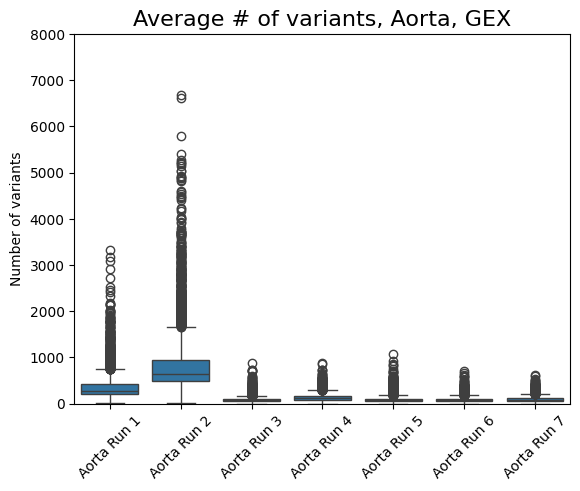

In [10]:
tmp_vireo_gex = vireo_gex[['t', 'n_vars']]
ax = sns.boxplot(tmp_vireo_gex, x='t', y='n_vars')
ax.grid(False)

ax.set_xlabel('')
ax.set_ylabel('Number of variants')
ax.set_title('Average # of variants, Aorta, GEX', fontsize=16)
ax.set_ylim(0, 8000)
plt.xticks(rotation=45)
ax.set_xticklabels(titles, rotation=45)
titles = [f'Run {i}' for i in range(7)]

/tmp/ipykernel_237535/1897983873.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation=45)


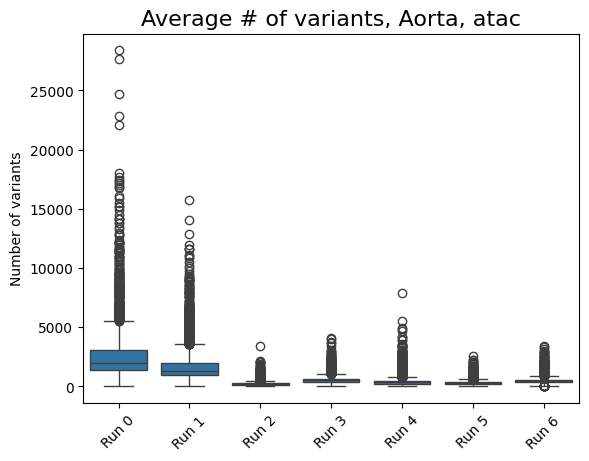

In [11]:
tmp_vireo_atac = vireo_atac[['t', 'n_vars']]
ax = sns.boxplot(tmp_vireo_atac, x='t', y='n_vars')
ax.grid(False)

ax.set_xlabel('')
ax.set_ylabel('Number of variants')
ax.set_title('Average # of variants, Aorta, atac', fontsize=16)
plt.xticks(rotation=45)
ax.set_xticklabels(titles, rotation=45)
titles = [f'Run {i}' for i in range(7)]

In [12]:
# for t in vireo_atac['t'].unique():
#     tmp_vireo_atac = vireo_atac[vireo_atac['t'] == t]
#     print(np.mean(tmp_vireo_atac['n_vars']))

In [13]:
tmp_vireo_gex['modality'] = 'gex'
tmp_vireo_atac['modality'] = 'atac'

tmp_vireo_gex = tmp_vireo_gex[['t', 'n_vars', 'modality']]
tmp_vireo_atac = tmp_vireo_atac[['t', 'n_vars', 'modality']]

/tmp/ipykernel_237535/1386510060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_vireo_gex['modality'] = 'gex'
/tmp/ipykernel_237535/1386510060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_vireo_atac['modality'] = 'atac'


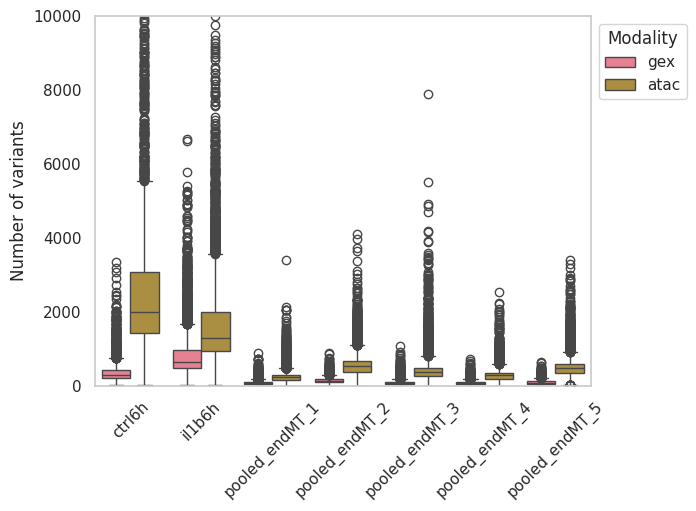

In [14]:
sns.set_theme(style='whitegrid', palette='husl')
concat = pd.concat([tmp_vireo_gex, tmp_vireo_atac])
ax = sns.boxplot(concat, x='t', y='n_vars', hue='modality')
ax.grid(False)

ax.set_xlabel('')
ax.set_ylabel('Number of variants')
ax.set_ylim(0,10000)
ax.tick_params(axis='x', rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1., 1), title='Modality')

In [15]:
np.mean(tmp_vireo_gex['n_vars'])

242.7098377886992

In [16]:
inter_gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex.csv', sep='\t', header=0, index_col=0)
inter_atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac.csv', sep='\t', header=0, index_col=0)
# inter_gex.drop(columns=['ambimux'], inplace=True)
# inter_atac.drop(columns=['ambimux'], inplace=True)
n_drops = inter_gex.shape[0]

In [17]:
# inter_gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex_raw_donors.csv', sep='\t', header=0, index_col=0)
# inter_atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac_raw_donors.csv', sep='\t', header=0, index_col=0)
inter_gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex.csv', sep='\t', header=0, index_col=0)
inter_atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac.csv', sep='\t', header=0, index_col=0)
for method in inter_gex.columns:
    inter_gex[method] = [x.split('_')[0] for x in inter_gex[method]]
    
for method in inter_atac.columns:
    inter_atac[method] = [x.split('_')[0] for x in inter_atac[method]]
inter_gex['demuxlet'].value_counts()

doublet       6536
donor3        5120
donor7        4066
unassigned    3706
donor8        3423
donor12       3066
donor9        1956
donor11       1632
donor5        1298
donor6        1054
donor4         911
donor2         868
donor1         770
donor0         571
donor10        224
Name: demuxlet, dtype: int64

In [18]:
# inter_gex['majority'] = inter_gex.mode(axis=1)[0]
# inter_atac['majority'] = inter_atac.mode(axis=1)[0]

In [19]:
inter_gex['sample'] = [''.join(x.split('_')[1:]) for x in inter_gex.index]
inter_atac['sample'] = [''.join(x.split('_')[1:]) for x in inter_atac.index]

In [20]:
status_gex = inter_gex.replace({'doublet' : 'non_singlet',
                                'unassigned' : 'non_singlet'}).drop(columns=['sample'])
status_atac = inter_atac.replace({'doublet' : 'non_singlet',
                                'unassigned' : 'non_singlet'}).drop(columns=['sample'])

In [21]:
singlet_gex = inter_gex.replace({'doublet' : 'non_singlet',
                                'unassigned' : 'non_singlet'})
singlet_atac = inter_atac.replace({'doublet' : 'non_singlet',
                                'unassigned' : 'non_singlet'})

mask = singlet_gex != 'non_singlet'
singlet_gex[mask] = 'singlet'

mask = singlet_atac != 'non_singlet'
singlet_atac[mask] = 'singlet'
    
tmp_singlet_gex = singlet_gex.copy()
tmp_singlet_gex.replace({'non_singlet' : 0,
                         'singlet' : 1}, inplace=True)
    
tmp_singlet_atac = singlet_atac.copy()
tmp_singlet_atac.replace({'non_singlet' : 0,
                         'singlet' : 1}, inplace=True)

# singlet_gex.drop(columns=['sample'], inplace=True)
# singlet_atac.drop(columns=['sample'], inplace=True)
    
tmp_singlet_gex.drop(columns=['sample'], inplace=True)
tmp_singlet_atac.drop(columns=['sample'], inplace=True)

tmp_singlet_gex.to_csv(f'{projdir}/csv/demux/singlet_gex.csv', sep='\t', header=True, index=True)
tmp_singlet_atac.to_csv(f'{projdir}/csv/demux/singlet_atac.csv', sep='\t', header=True, index=True)
tmp_singlet_gex.columns = [f'gex_{x}' for x in tmp_singlet_gex.columns]
tmp_singlet_atac.columns = [f'atac_{x}' for x in tmp_singlet_atac.columns]
tmp_singlet_merged = pd.concat([tmp_singlet_gex, tmp_singlet_atac], axis=1)
tmp_singlet_merged.to_csv(f'{projdir}/csv/demux/singlet_merged.csv', sep='\t', header=True, index=True)

In [22]:
tmp_status_gex = status_gex.copy()
for i in range(0, 13):
    tmp_status_gex.replace({f'donor{i}' : 1}, inplace=True)
tmp_status_gex.replace({'non_singlet' : 0}, inplace=True)
    
tmp_status_atac = status_atac.copy()
for i in range(0, 13):
    tmp_status_atac.replace({f'donor{i}' : 1}, inplace=True)
tmp_status_atac.replace({'non_singlet' : 0}, inplace=True)

In [23]:
status_gex

,demuxlet,freemuxlet,vireo,vireo_nogenos,souporcell,souporcell_nogenos,demuxalot,scsplit,scsplit_nogenos
AAACAGCCAACTAGCC-1_ctrl6h,donor9,donor9,donor9,donor9,donor9,donor9,donor9,donor9,donor9
AAACAGCCACACAATT-1_ctrl6h,donor1,donor1,donor1,donor1,donor1,donor1,donor1,donor1,donor1
AAACAGCCACTCGCTC-1_ctrl6h,donor10,donor10,donor10,donor10,donor10,donor10,donor10,non_singlet,donor9
AAACCAACAGAACCGA-1_ctrl6h,donor4,donor4,donor4,donor4,donor4,donor4,non_singlet,donor6,donor9
AAACCGAAGCTATGAC-1_ctrl6h,donor9,donor9,donor9,donor9,donor9,donor9,donor9,donor11,donor11
...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGGGATTT-1_pooled_endMT_5,donor12,donor12,donor12,donor12,donor12,donor12,donor12,donor12,donor12
TTTGTGTTCGTTATAG-1_pooled_endMT_5,non_singlet,donor7,donor7,donor7,donor7,donor7,donor7,donor8,donor8
TTTGTTGGTCCCGAAG-1_pooled_endMT_5,non_singlet,donor7,non_singlet,donor7,donor7,donor7,donor7,donor7,donor7
TTTGTTGGTGAGACTC-1_pooled_endMT_5,donor8,donor8,donor8,donor8,donor8,donor8,donor8,donor8,donor8


In [24]:
tmp_status_gex.to_csv(f'{projdir}/csv/demux/status_gex.csv', sep='\t', header=True, index=True)
tmp_status_atac.to_csv(f'{projdir}/csv/demux/status_atac.csv', sep='\t', header=True, index=True)

In [25]:
tmp_status_gex.columns = [f'gex_{x}' for x in tmp_status_gex.columns]
tmp_status_atac.columns = [f'atac_{x}' for x in tmp_status_atac.columns]

In [26]:
tmp_status_merged = pd.concat([tmp_status_gex, tmp_status_atac], axis=1)
tmp_status_merged.to_csv(f'{projdir}/csv/demux/status_merged.csv', sep='\t', header=True, index=True)

### panel A

In [27]:
tmp_gex = status_gex.melt()
tmp_atac = status_atac.melt()

In [28]:
tmp_gex

,variable,value
0,demuxlet,donor9
1,demuxlet,donor1
2,demuxlet,donor10
3,demuxlet,donor4
4,demuxlet,donor9
...,...,...
316804,scsplit_nogenos,donor12
316805,scsplit_nogenos,donor8
316806,scsplit_nogenos,donor7
316807,scsplit_nogenos,donor8


/tmp/ipykernel_237535/2837382388.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(gex_methods, rotation=90, fontsize=15)


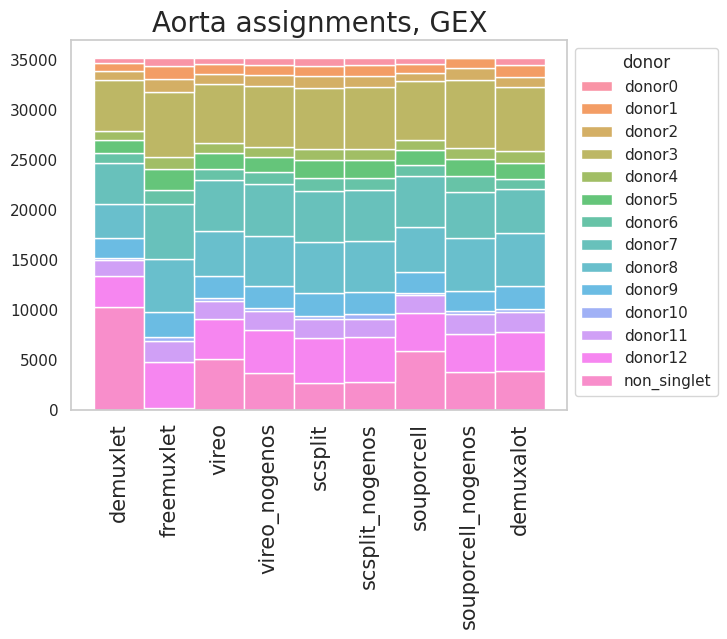

In [29]:
plot_order = [f'donor{i}' for i in range(13)] + ['non_singlet'] 
ax = sns.histplot(data=tmp_gex, x='variable', hue='value', multiple='stack',hue_order=plot_order)
ax.set_title('Aorta assignments, GEX', fontsize=20)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.grid(False)
ax.set_xticklabels(gex_methods, rotation=90, fontsize=15)
# ax.set_yticklabels([0, 10000, 20000, 30000], fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('')
# ax.tick_params(axis='x', which='major', labelsize=15)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1., 1), title='donor')

/tmp/ipykernel_237535/360154746.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(atac_methods, rotation=90, fontsize=15)


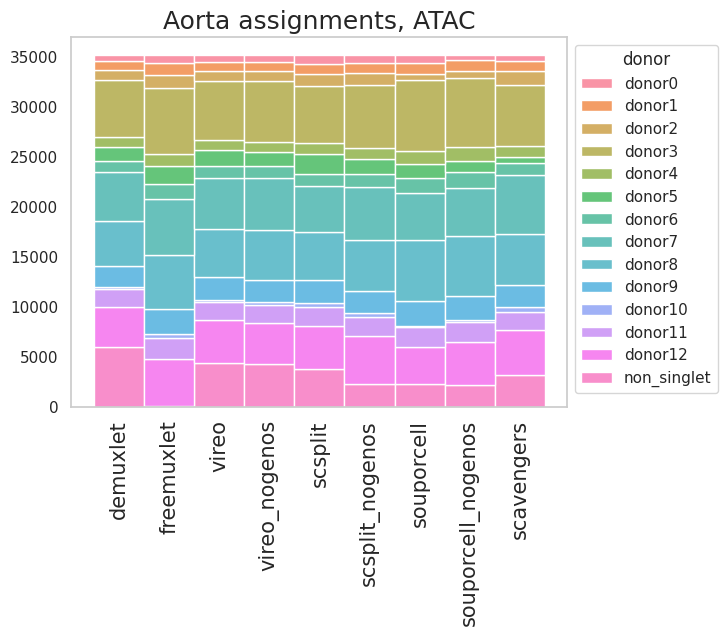

In [30]:
# plt.figure(figsize=(12,8))
plot_order = [f'donor{i}' for i in range(13)] + ['non_singlet'] 
ax = sns.histplot(data=tmp_atac, x='variable', hue='value', multiple='stack',hue_order=plot_order)
ax.set_title('Aorta assignments, ATAC', fontsize=18)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.grid(False)
ax.set_xticklabels(atac_methods, rotation=90, fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1., 1), title='donor')

In [31]:
tmp_gex.to_csv(f'{projdir}/csv/final_figures/figure4/figure_s7_gex_dist.csv', sep='\t', header=True, index=True)
tmp_atac.to_csv(f'{projdir}/csv/final_figures/figure4/figure_s7_atac_dist.csv', sep='\t', header=True, index=True)

In [32]:
n_drops = singlet_gex.shape[0]
all_overlap_gex = pd.DataFrame(columns=gex_methods)
for method1 in gex_methods:
    all_overlap_gex.loc[method1] = [np.sum(singlet_gex[method1] == singlet_gex[method2]) / n_drops
                            for method2 in gex_methods]
all_overlap_gex

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,demuxalot
demuxlet,1.000000,0.712025,0.788245,0.774779,0.679214,0.677339,0.761825,0.763217,0.789637
freemuxlet,0.712025,1.000000,0.859635,0.899065,0.895940,0.890997,0.926565,0.924150,0.833073
vireo,0.788245,0.859635,1.000000,0.930229,0.800744,0.797676,0.919036,0.921281,0.920315
vireo_nogenos,0.774779,0.899065,0.930229,1.000000,0.831993,0.828982,0.946649,0.951564,0.902929
scsplit,0.679214,0.895940,0.800744,0.831993,1.000000,0.922048,0.849777,0.849010,0.774637
scsplit_nogenos,0.677339,0.890997,0.797676,0.828982,0.922048,1.000000,0.845004,0.843612,0.772762
souporcell,0.761825,0.926565,0.919036,0.946649,0.849777,0.845004,1.000000,0.976563,0.885998
souporcell_nogenos,0.763217,0.924150,0.921281,0.951564,0.849010,0.843612,0.976563,1.000000,0.888696
demuxalot,0.789637,0.833073,0.920315,0.902929,0.774637,0.772762,0.885998,0.888696,1.000000


In [33]:
n_drops = singlet_atac.shape[0]
all_overlap_atac = pd.DataFrame(columns=atac_methods)
for method1 in atac_methods:
    all_overlap_atac.loc[method1] = [np.sum(singlet_atac[method1] == singlet_atac[method2]) / n_drops
                            for method2 in atac_methods]
all_overlap_atac

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,scavengers
demuxlet,1.000000,0.831283,0.930939,0.899776,0.807449,0.810630,0.874862,0.884293,0.876651
freemuxlet,0.831283,1.000000,0.877844,0.879293,0.934348,0.938382,0.894151,0.937729,0.910826
vireo,0.930939,0.877844,1.000000,0.946564,0.845885,0.849976,0.909378,0.932616,0.918156
vireo_nogenos,0.899776,0.879293,0.946564,1.000000,0.845800,0.850061,0.886793,0.928042,0.904264
scsplit,0.807449,0.934348,0.845885,0.845800,1.000000,0.959319,0.858612,0.889293,0.872845
scsplit_nogenos,0.810630,0.938382,0.849976,0.850061,0.959319,1.000000,0.864919,0.894463,0.878356
souporcell,0.874862,0.894151,0.909378,0.886793,0.858612,0.864919,1.000000,0.926423,0.908667
souporcell_nogenos,0.884293,0.937729,0.932616,0.928042,0.889293,0.894463,0.926423,1.000000,0.934178
scavengers,0.876651,0.910826,0.918156,0.904264,0.872845,0.878356,0.908667,0.934178,1.000000


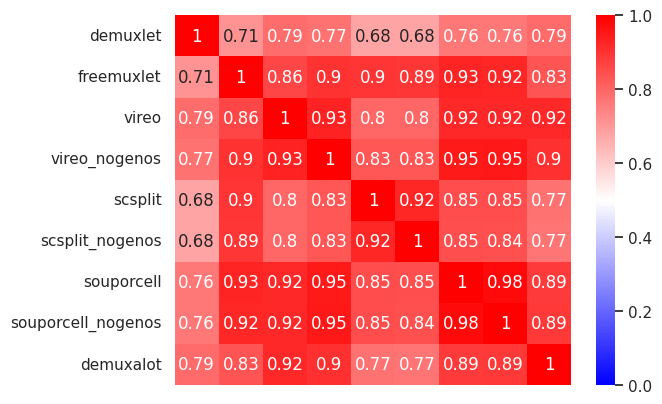

In [34]:
ax = sns.heatmap(all_overlap_gex, annot=True, xticklabels='', vmin=0, vmax=1, cmap='bwr')

Text(0.5, 0.98, 'Aorta dataset')

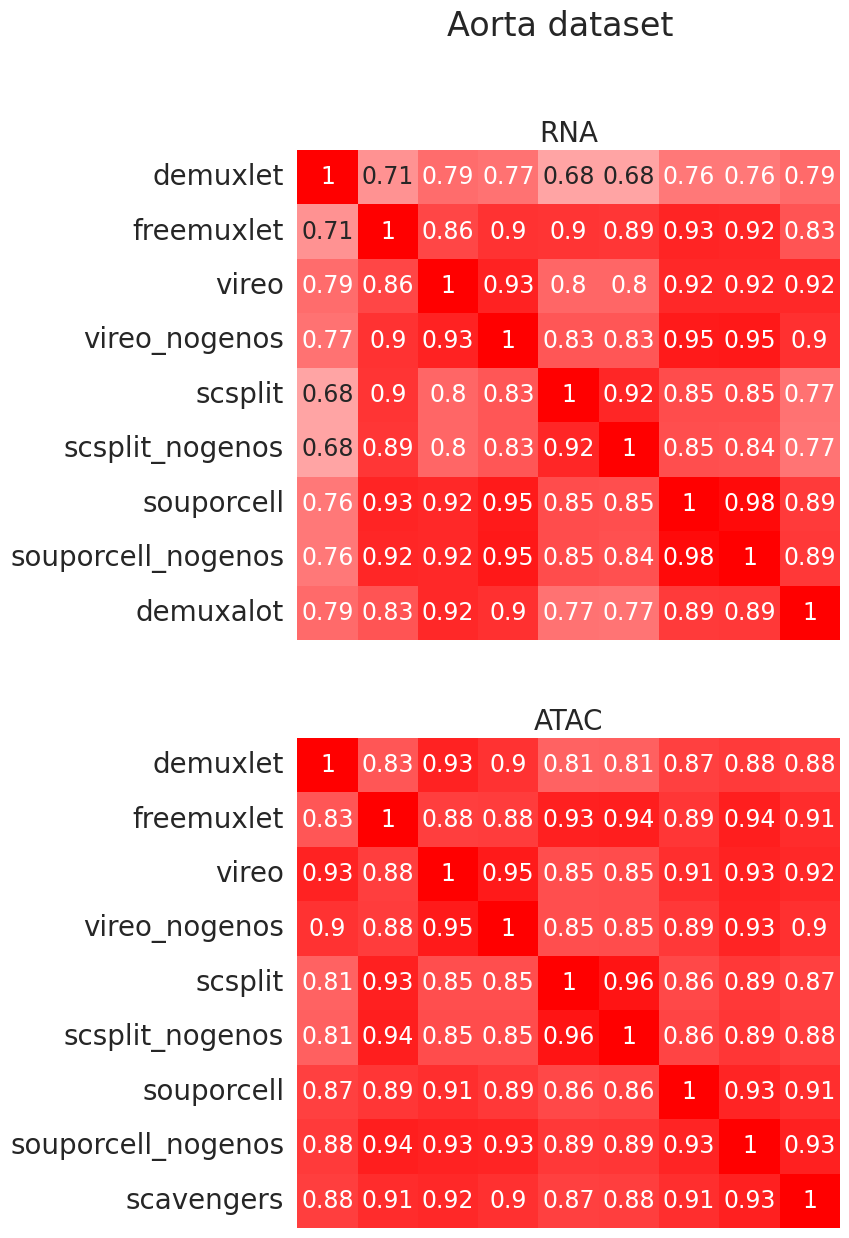

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(7, 14))
plt.subplots_adjust(wspace=0.4)

sns.heatmap(all_overlap_gex, annot=True, xticklabels='', vmin=0, vmax=1, cmap='bwr',
            annot_kws={'size': 17}, cbar=False, ax = axes[0])
sns.heatmap(all_overlap_atac, annot=True, xticklabels='', vmin=0, vmax=1, cmap='bwr',
            annot_kws={'size': 17}, cbar=False, ax = axes[1])
axes[0].set_title('RNA', fontsize=20)
axes[1].set_title('ATAC', fontsize=20)

axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize = 20)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize = 20)

fig.suptitle('Aorta dataset', fontsize=24)

In [36]:
basedir = '/u/project/cluo/terencew/igvf/pilot/multiome/'
all_overlap_gex.to_csv(f'{basedir}/csv/final_figures/figure4/adelus_overlap_gex.csv',
                       sep='\t', header=True, index=True)
all_overlap_atac.to_csv(f'{basedir}/csv/final_figures/figure4/adelus_overlap_atac.csv',
                       sep='\t', header=True, index=True)

In [38]:
all_donor_gex = pd.DataFrame(columns=gex_methods, index=gex_methods)
for method1 in gex_methods:
    mask1 = status_gex[method1] != 'non_singlet'
    tmp_gex = status_gex[mask1]
    for method2 in gex_methods:
        mask2 = tmp_gex[method2] != 'non_singlet'
        tmp_gex = tmp_gex[mask2]
        n_drops = tmp_gex.shape[0]
        all_donor_gex.loc[method1,method2] = float(np.sum(tmp_gex[method1] == tmp_gex[method2]) / n_drops)

all_donor_atac = pd.DataFrame(columns=atac_methods, index=atac_methods)
for method1 in atac_methods:
    mask1 = status_atac[method1] != 'non_singlet'
    tmp_atac = status_atac[mask1]
    for method2 in atac_methods:
        mask2 = tmp_atac[method2] != 'non_singlet'
        tmp_atac = tmp_atac[mask2]
        n_drops = tmp_atac.shape[0]
        all_donor_atac.loc[method1,method2] = float(np.sum(tmp_atac[method1] == tmp_atac[method2]) / n_drops)
all_donor_atac

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,scavengers
demuxlet,1.0,0.989701,0.996462,0.988376,0.870872,0.897838,0.988399,0.989335,0.960295
freemuxlet,0.989701,1.0,0.995456,0.992797,0.873196,0.90035,0.989692,0.991688,0.962846
vireo,0.996462,0.995456,1.0,0.991371,0.873046,0.90016,0.990359,0.991492,0.962288
vireo_nogenos,0.986365,0.99184,0.991371,1.0,0.873983,0.900502,0.984127,0.990159,0.963444
scsplit,0.848105,0.850959,0.853057,0.873983,1.0,0.920219,0.86604,0.875515,0.855731
scsplit_nogenos,0.872411,0.875467,0.877466,0.897062,0.920219,1.0,0.892691,0.900765,0.887303
souporcell,0.985004,0.983618,0.989589,0.981904,0.864277,0.892691,1.0,0.9822,0.953677
souporcell_nogenos,0.975716,0.982492,0.980825,0.989288,0.874348,0.900305,0.9822,1.0,0.962886
scavengers,0.938951,0.946398,0.94298,0.96225,0.854505,0.887574,0.953531,0.962886,1.0


Text(0.5, 0.98, 'Aorta dataset')

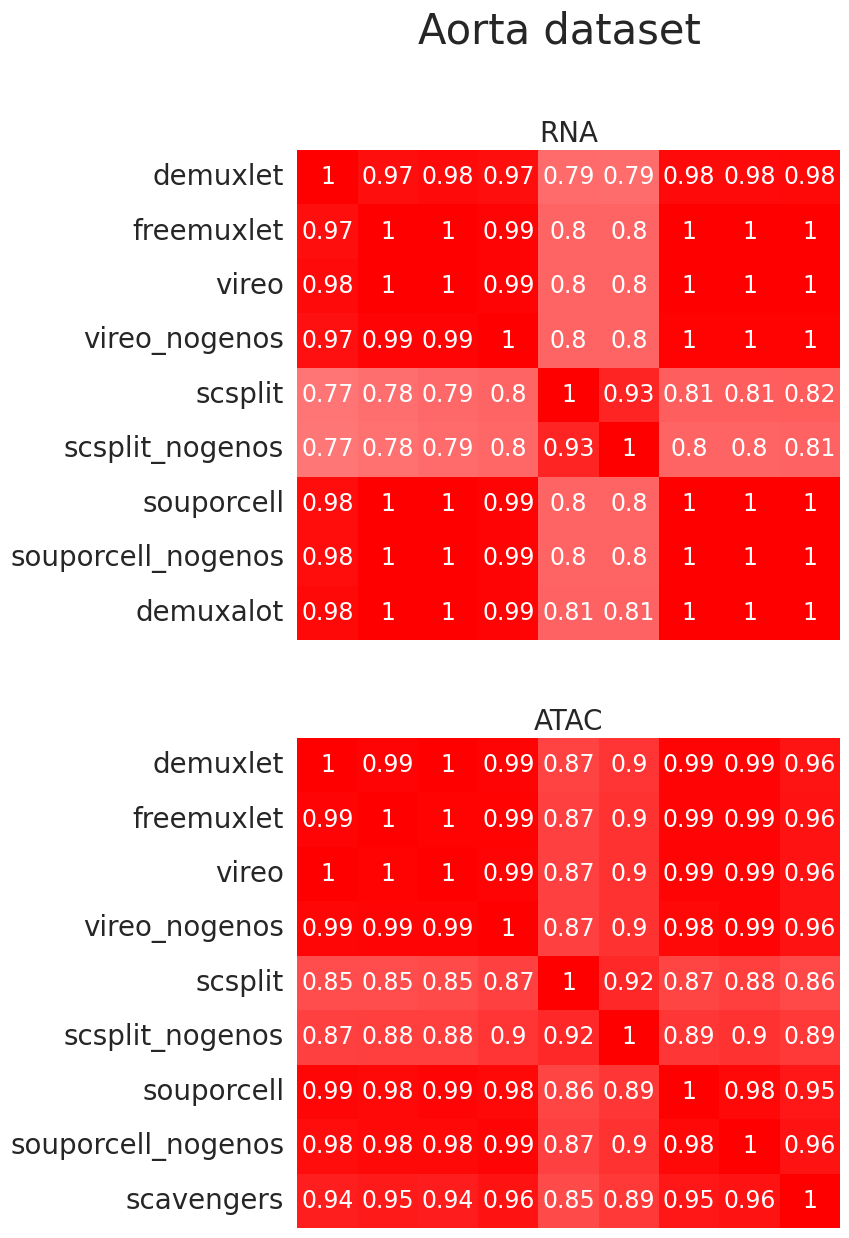

In [39]:
# sns.set(font_scale = 1)
fig, axes = plt.subplots(2, 1, figsize=(7, 14))  # 2 rows, 4 columns
plt.subplots_adjust(wspace=0.4)

all_donor_gex = all_donor_gex.astype(float)
all_donor_atac = all_donor_atac.astype(float)

sns.heatmap(all_donor_gex, annot=True, xticklabels='', vmin=0, vmax=1, cmap='bwr',
            annot_kws={'size': 17}, cbar=False, ax = axes[0])
sns.heatmap(all_donor_atac, annot=True, xticklabels='', vmin=0, vmax=1, cmap='bwr',
            annot_kws={'size': 17}, cbar=False, ax = axes[1])
axes[0].set_title('RNA', fontsize=20)
axes[1].set_title('ATAC', fontsize=20)

axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize = 20)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize = 20)

fig.suptitle('Aorta dataset', fontsize=30)

In [41]:
tmpdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'

all_donor_gex.to_csv(f'{tmpdir}/csv/final_figures/figure4/adelus_donor_gex.csv',
                       sep='\t', header=True, index=True)
all_donor_atac.to_csv(f'{tmpdir}/csv/final_figures/figure4/adelus_donor_atac.csv',
                       sep='\t', header=True, index=True)

In [37]:
### cross modality
n_drops = status_atac.shape[0]
cross_overlap = pd.DataFrame(columns=atac_methods)
for method1 in overlap_methods:
    cross_overlap.loc[method1] = [np.sum(status_gex[method1] == status_atac[method1]) / n_drops
                            for method2 in atac_methods]

cross_overlap
# sns.heatmap(cross_overlap, annot=True, xticklabels='', cmap='bwr', cbar=False)

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,scavengers
demuxlet,0.741882,0.741882,0.741882,0.741882,0.741882,0.741882,0.741882,0.741882,0.741882
freemuxlet,0.950200,0.950200,0.950200,0.950200,0.950200,0.950200,0.950200,0.950200,0.950200
vireo,0.915400,0.915400,0.915400,0.915400,0.915400,0.915400,0.915400,0.915400,0.915400
vireo_nogenos,0.909775,0.909775,0.909775,0.909775,0.909775,0.909775,0.909775,0.909775,0.909775
scsplit,0.606886,0.606886,0.606886,0.606886,0.606886,0.606886,0.606886,0.606886,0.606886
scsplit_nogenos,0.598534,0.598534,0.598534,0.598534,0.598534,0.598534,0.598534,0.598534,0.598534
souporcell,0.871708,0.871708,0.871708,0.871708,0.871708,0.871708,0.871708,0.871708,0.871708
souporcell_nogenos,0.901849,0.901849,0.901849,0.901849,0.901849,0.901849,0.901849,0.901849,0.901849


In [38]:
### cross modality
n_drops = status_atac.shape[0]
cross_overlap = pd.DataFrame(columns=atac_methods)
for method1 in overlap_methods:
    cross_overlap.loc[method1] = [np.sum(status_gex[method1] == status_atac[method2]) / n_drops
                            for method2 in atac_methods]

cross_overlap
# sns.heatmap(cross_overlap, annot=True, xticklabels='', cmap='bwr', cbar=False)

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,scavengers
demuxlet,0.741882,0.685719,0.760064,0.741769,0.576063,0.593421,0.706088,0.716457,0.684100
freemuxlet,0.819863,0.950200,0.868725,0.859351,0.748132,0.772393,0.854578,0.889463,0.831596
vireo,0.876452,0.849010,0.915400,0.890855,0.689639,0.713332,0.847135,0.873043,0.821852
vireo_nogenos,0.872532,0.880344,0.916707,0.909775,0.717224,0.743985,0.859691,0.894037,0.851425
scsplit,0.600239,0.656402,0.624982,0.632141,0.606886,0.607341,0.605693,0.628476,0.610466
scsplit_nogenos,0.596801,0.651118,0.621573,0.631147,0.597966,0.598534,0.601034,0.626630,0.610636
souporcell,0.865572,0.905287,0.911707,0.894918,0.722309,0.746825,0.871708,0.899463,0.842192
souporcell_nogenos,0.867163,0.903895,0.913838,0.896764,0.722224,0.746484,0.872504,0.901849,0.843641


### split by sample

In [39]:
status_gex['sample'] = inter_gex['sample']
gex_overlap = []
for sample in new_samples:
    print(sample)
    tmp_gex = status_gex[status_gex['sample'] == sample].drop(columns=['sample'])
    n_drops = tmp_gex.shape[0]
    overlap = pd.DataFrame(columns=gex_methods)
    for method1 in gex_methods:
        overlap.loc[method1] = [np.sum(tmp_gex[method1] == tmp_gex[method2]) / n_drops
                                for method2 in gex_methods]
    gex_overlap.append(overlap)

ctrl6h
il1b6h
pooledendMT1
pooledendMT2
pooledendMT3
pooledendMT4
pooledendMT5


In [40]:
status_atac['sample'] = inter_atac['sample']
atac_overlap = []
for sample in new_samples:
    print(sample)
    tmp_atac = status_atac[status_atac['sample'] == sample].drop(columns=['sample'])
    n_drops = tmp_atac.shape[0]
    overlap = pd.DataFrame(columns=atac_methods)
    for method1 in atac_methods:
        overlap.loc[method1] = [np.sum(tmp_atac[method1] == tmp_atac[method2]) / n_drops
                                for method2 in atac_methods]
    atac_overlap.append(overlap)

ctrl6h
il1b6h
pooledendMT1
pooledendMT2
pooledendMT3
pooledendMT4
pooledendMT5


Text(0.5, 0.98, 'RNA Individual Assignment')

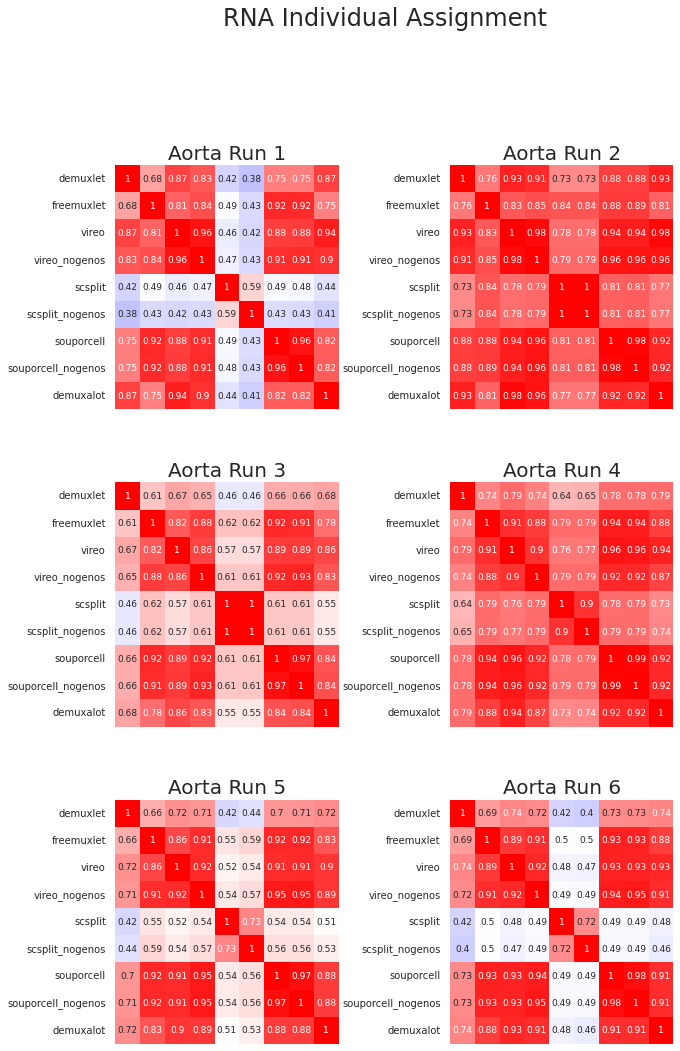

In [41]:
### gex
titles = [f'Aorta Run {i}' for i in range(1, 8)]
fig, axes = plt.subplots(4, 2, figsize=(10, 22))  # 2 rows, 4 columns
plt.subplots_adjust(wspace=0.5, hspace=0.3)
for i, ax in enumerate(axes.flat):
    if i < 6:
        sample = samples[i]
        to_plot = gex_overlap[i]
        sns.heatmap(to_plot, annot=True, xticklabels='',
                    vmin=0, vmax=1, cmap='bwr', cbar=False,
                    annot_kws={'size': 9}, ax=ax)
        ax.set_title(titles[i], fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize = 10)
    else:
        ax.remove()

fig.suptitle('RNA Individual Assignment', fontsize=24)

Text(0.5, 0.98, 'ATAC Individual Assignment')

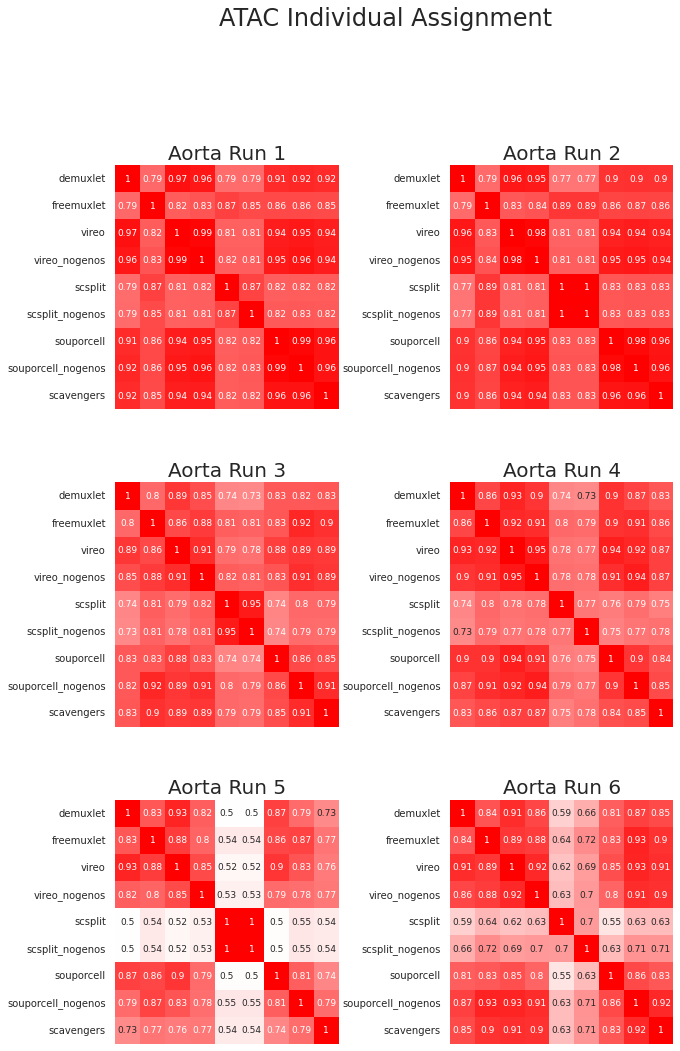

In [42]:
### atac
titles = [f'Aorta Run {i}' for i in range(1, 8)]
fig, axes = plt.subplots(4, 2, figsize=(10, 22))  # 2 rows, 4 columns
plt.subplots_adjust(wspace=0.5, hspace=0.3)
for i, ax in enumerate(axes.flat):
    if i < 6:
        sample = samples[i]
        to_plot = atac_overlap[i]
        sns.heatmap(to_plot, annot=True, xticklabels='',
                    vmin=0, vmax=1, cmap='bwr', cbar=False,
                    annot_kws={'size': 9}, ax=ax)
        ax.set_title(titles[i], fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize = 10)
    else:
        ax.remove()
fig.suptitle('ATAC Individual Assignment', fontsize=24)

In [43]:
# fig, axes = plt.subplots(2, 1, figsize=(4, 8))  # 2 rows, 4 columns
# plt.subplots_adjust(wspace=0.4)

# sns.heatmap(gex_overlap[0], annot=True, xticklabels='', vmin=0, vmax=1, cmap='bwr', cbar=False, ax = axes[0])
# sns.heatmap(gex_overlap[-1], annot=True, xticklabels='',vmin=0, vmax=1, cmap='bwr', cbar=False, ax = axes[1])
# axes[0].set_title('Adelus, ctrl6h')
# axes[1].set_title('Adelus, pooled_endMT_5')

### compute variance of correct calls in atac vs. gene expression

In [44]:
overlap_methods

['demuxlet',
 'freemuxlet',
 'vireo',
 'vireo_nogenos',
 'scsplit',
 'scsplit_nogenos',
 'souporcell',
 'souporcell_nogenos']

In [45]:
status_atac['sample'] = inter_atac['sample']
frac_same_droplets = []
n_entries = len(overlap_methods)
# compare = pd.DataFrame(columns=['GEX', 'ATAC'])
for sample in new_samples:
    compare = pd.DataFrame()
    print(sample)
    tmp_atac = status_atac[status_atac['sample'] == sample].drop(columns=['sample'])
    tmp_gex = status_gex[status_gex['sample'] == sample].drop(columns=['sample'])
    n_drops = tmp_atac.shape[0]
    gex_new_overlap = pd.DataFrame(columns=overlap_methods)
    atac_new_overlap = pd.DataFrame(columns=overlap_methods)
    for method1 in overlap_methods:
        gex_new_overlap.loc[method1] = [np.sum(tmp_gex[method1] == tmp_gex[method2]) / n_drops
                                for method2 in overlap_methods]
        atac_new_overlap.loc[method1] = [np.sum(tmp_atac[method1] == tmp_atac[method2]) / n_drops
                                for method2 in overlap_methods]
    compare['RNA'] = np.mean(gex_new_overlap.mask(np.eye(n_entries, dtype=bool)))
    compare['ATAC'] = np.mean(atac_new_overlap.mask(np.eye(n_entries, dtype=bool)))
    compare['method'] = overlap_methods
    frac_same_droplets.append(compare)

ctrl6h
il1b6h
pooledendMT1
pooledendMT2
pooledendMT3
pooledendMT4
pooledendMT5


In [46]:
gex_fracs = np.vstack([x.iloc[:,0] for x in frac_same_droplets])
atac_fracs = np.vstack([x.iloc[:,1] for x in frac_same_droplets])
gex_fracs, atac_fracs

(array([[0.66908499, 0.72747659, 0.75421009, 0.76498263, 0.485556  ,
         0.44290551, 0.76194873, 0.76252034],
        [0.83090481, 0.83931701, 0.88370637, 0.89211857, 0.82301838,
         0.82301838, 0.89559862, 0.89584898],
        [0.59667057, 0.77095542, 0.75346182, 0.78189434, 0.64062161,
         0.64062161, 0.79741286, 0.79802058],
        [0.73297969, 0.85612164, 0.86295813, 0.84897311, 0.77910473,
         0.78174288, 0.88077272, 0.88034721],
        [0.62269854, 0.77320874, 0.7690772 , 0.79284051, 0.55099268,
         0.5714563 , 0.793811  , 0.79528061],
        [0.63284823, 0.76483516, 0.76572617, 0.77484407, 0.51179091,
         0.50896941, 0.78339768, 0.78517969],
        [0.68489376, 0.84841712, 0.84449819, 0.87036924, 0.77496785,
         0.75127059, 0.86133733, 0.86543996]]),
 array([[0.87631359, 0.84091808, 0.89829838, 0.90194785, 0.82711164,
         0.82654003, 0.89816647, 0.90251946],
        [0.86257573, 0.85363777, 0.89392119, 0.89927895, 0.84970708,
         

In [427]:
gex_mean = np.mean(gex_fracs, axis=0)
gex_var = np.var(gex_fracs, axis=0)
gex_mean, gex_var

(array([0.68144009, 0.79719024, 0.80480542, 0.81800321, 0.65229317,
        0.6457121 , 0.82489699, 0.82609105]),
 array([0.00545117, 0.00214886, 0.00274034, 0.0022579 , 0.01688822,
        0.01806477, 0.00240787, 0.00240149]))

In [428]:
atac_mean = np.mean(atac_fracs, axis=0)
atac_var = np.var(atac_fracs, axis=0)
atac_mean, atac_var

(array([0.82647049, 0.83823962, 0.86128824, 0.85437082, 0.74301879,
        0.76572251, 0.83082555, 0.8568866 ]),
 array([0.00178635, 0.00128511, 0.00173705, 0.00334325, 0.0086065 ,
        0.00760371, 0.00313528, 0.00276213]))

In [429]:
overlap_methods

['demuxlet',
 'freemuxlet',
 'vireo',
 'vireo_nogenos',
 'scsplit',
 'scsplit_nogenos',
 'souporcell',
 'souporcell_nogenos']

Text(0, 0.5, 'Mean overlap with other methods')

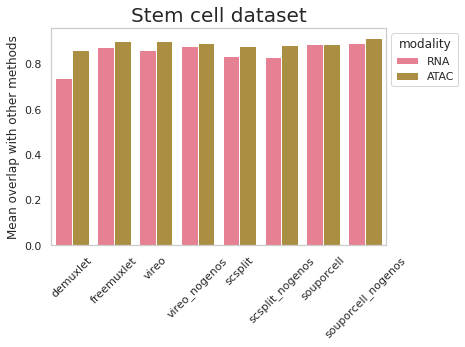

In [430]:
singlet_gex['sample'] = inter_gex['sample']
singlet_atac['sample'] = inter_atac['sample']
n_entries = len(overlap_methods)
n_drops = singlet_gex.shape[0]
compare = pd.DataFrame(columns=['RNA', 'ATAC'])
gex_new_overlap = pd.DataFrame(columns=overlap_methods)
atac_new_overlap = pd.DataFrame(columns=overlap_methods)
for method1 in overlap_methods:
    atac_new_overlap.loc[method1] = [np.sum(singlet_atac[method1] == singlet_atac[method2]) / n_drops
                            for method2 in overlap_methods]
    gex_new_overlap.loc[method1] = [np.sum(singlet_gex[method1] == singlet_gex[method2]) / n_drops
                            for method2 in overlap_methods]
compare['RNA'] = np.mean(gex_new_overlap.mask(np.eye(n_entries, dtype=bool)))
compare['ATAC'] = np.mean(atac_new_overlap.mask(np.eye(n_entries, dtype=bool)))
compare['method'] = overlap_methods
compare
sns.set_theme(palette="husl", style='whitegrid')
tmp_compare = compare.melt(id_vars='method')
tmp_compare.columns = ['method', 'modality', 'frac_overlap']
ax = sns.barplot(tmp_compare, x='method', y='frac_overlap', hue='modality')
ax.set_title('Stem cell dataset', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.legend_.remove()
ax.grid(False)
ax.set_xlabel('')
ax.set_ylabel('Mean overlap with other methods')

<AxesSubplot:xlabel='method', ylabel='frac_overlap'>

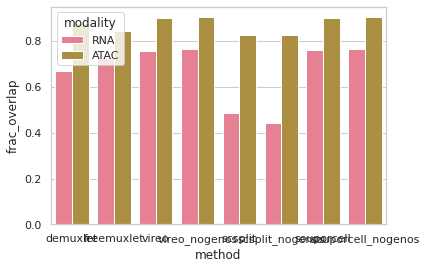

In [431]:
compare = frac_same_droplets[0].melt(id_vars='method')
compare.columns = ['method', 'modality', 'frac_overlap']
sns.barplot(compare, x='method', y='frac_overlap', hue='modality')

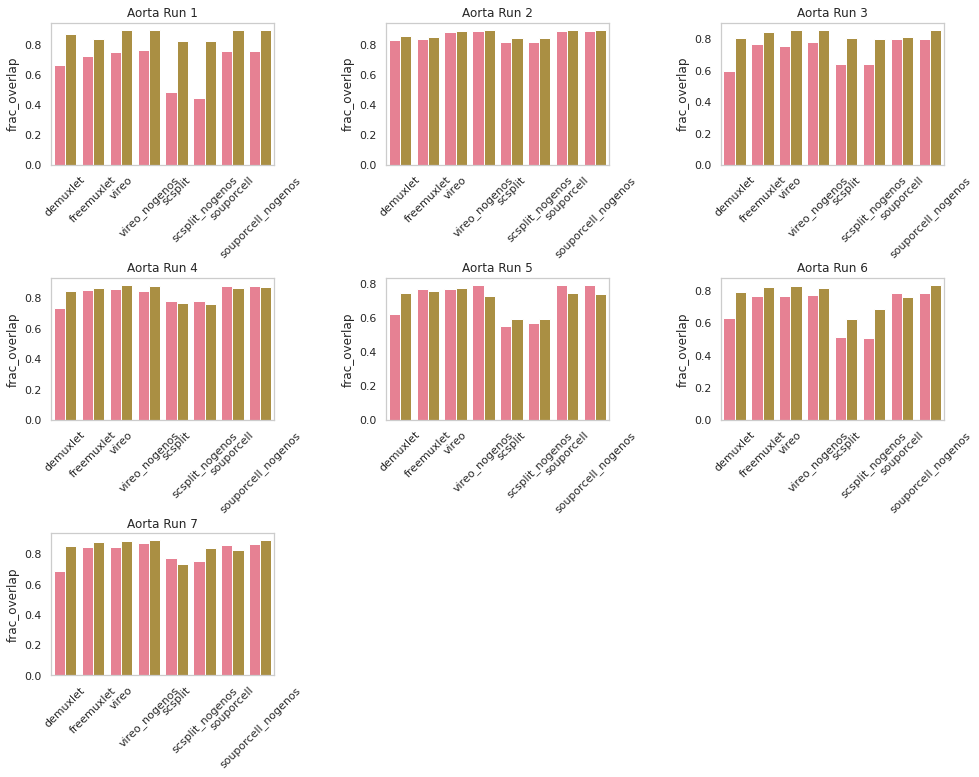

In [432]:
sns.set_theme(palette="husl", style='whitegrid')
fig, axes = plt.subplots(3, 3, figsize=(16, 12))  # 2 rows, 4 columns
plt.subplots_adjust(wspace=0.5, hspace=0.8)
for i, ax in enumerate(axes.flat):
    if i < 7:
        sample = samples[i]
        compare = frac_same_droplets[i].melt(id_vars='method')
        compare.columns = ['method', 'modality', 'frac_overlap']
        sns.barplot(compare, x='method', y='frac_overlap', hue='modality', ax=ax)
        ax.set_title(titles[i])
        ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
        ax.legend_.remove()
        ax.grid(False)
        ax.set_xlabel('')
    else:
        ax.remove()

In [433]:
n_drops = status_gex.shape[0]
singlets = pd.DataFrame(columns=['singlet_rate'])
for method in status_gex.columns:
    singlets.loc[method] = (n_drops - np.sum(status_gex[method] == 'non_singlet')) / n_drops
singlets

,singlet_rate
demuxlet,0.709042
freemuxlet,0.996676
vireo,0.856311
vireo_nogenos,0.896139
souporcell,0.923298
souporcell_nogenos,0.920940
demuxalot,0.832476
scsplit,0.894492
scsplit_nogenos,0.889549
sample,1.000000


In [434]:
n_drops = status_atac.shape[0]
singlets = pd.DataFrame(columns=['singlet_rate'])
for method in status_atac.columns:
    singlets.loc[method] = (n_drops - np.sum(status_atac[method] == 'non_singlet')) / n_drops
singlets

,singlet_rate
demuxlet,0.830289
freemuxlet,0.999006
vireo,0.876907
vireo_nogenos,0.878413
souporcell,0.893725
souporcell_nogenos,0.937246
scsplit,0.934775
scsplit_nogenos,0.939036
scavengers,0.910571
sample,1.000000


### cross modality

In [435]:
n_entries = len(overlap_methods)
n_drops = singlet_gex.shape[0]
compare = pd.DataFrame(columns=['GEX', 'ATAC'])
cross_overlap = pd.DataFrame(columns=overlap_methods)
gex_new_overlap = pd.DataFrame(columns=overlap_methods)
atac_new_overlap = pd.DataFrame(columns=overlap_methods)

for method1 in overlap_methods:
    cross_overlap.loc[method1] = [np.sum(singlet_gex[method1] == singlet_atac[method2]) / n_drops
                            for method2 in overlap_methods]
    atac_new_overlap.loc[method1] = [np.sum(singlet_atac[method1] == singlet_atac[method2]) / n_drops
                            for method2 in overlap_methods]
    gex_new_overlap.loc[method1] = [np.sum(singlet_gex[method1] == singlet_gex[method2]) / n_drops
                            for method2 in overlap_methods]
    
compare['GEX'] = np.mean(gex_new_overlap.mask(np.eye(n_entries, dtype=bool)))
compare['ATAC'] = np.mean(atac_new_overlap.mask(np.eye(n_entries, dtype=bool)))
compare['cross'] = np.mean(cross_overlap.mask(np.eye(n_entries, dtype=bool)))
compare['method'] = overlap_methods

Text(0, 0.5, 'Mean overlap with other methods')

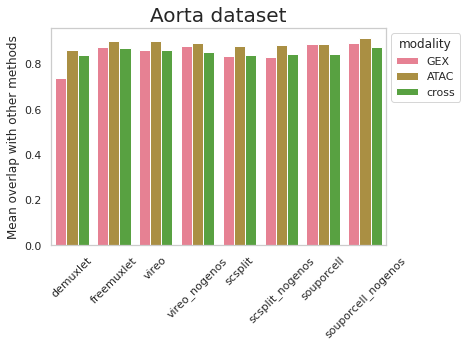

In [436]:
sns.set_theme(palette="husl", style='whitegrid')
tmp_compare = compare.melt(id_vars='method')
tmp_compare.columns = ['method', 'modality', 'frac_overlap']
ax = sns.barplot(tmp_compare, x='method', y='frac_overlap', hue='modality')
ax.set_title('Aorta dataset', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.legend_.remove()
ax.grid(False)
ax.set_xlabel('')
ax.set_ylabel('Mean overlap with other methods')

In [437]:
tmp_compare.to_csv(f'{projdir}/csv/final_figures/figure4/figure_4c_adelus_mean.csv', sep='\t', header=True, index=True)